<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>import</a></span></li></ul></li><li><span><a href="#划分数据集" data-toc-modified-id="划分数据集-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>划分数据集</a></span><ul class="toc-item"><li><span><a href="#目标-status" data-toc-modified-id="目标-status-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>目标 status</a></span></li><li><span><a href="#数据类型" data-toc-modified-id="数据类型-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>数据类型</a></span></li></ul></li><li><span><a href="#特征工程" data-toc-modified-id="特征工程-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>特征工程</a></span><ul class="toc-item"><li><span><a href="#特征预处理" data-toc-modified-id="特征预处理-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>特征预处理</a></span><ul class="toc-item"><li><span><a href="#cols_to_del" data-toc-modified-id="cols_to_del-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>cols_to_del</a></span></li><li><span><a href="#cols_0_to_1" data-toc-modified-id="cols_0_to_1-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>cols_0_to_1</a></span></li><li><span><a href="#cols_catg" data-toc-modified-id="cols_catg-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>cols_catg</a></span></li><li><span><a href="#cols_date" data-toc-modified-id="cols_date-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>cols_date</a></span></li><li><span><a href="#cols_nums" data-toc-modified-id="cols_nums-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>cols_nums</a></span></li></ul></li><li><span><a href="#处理空值" data-toc-modified-id="处理空值-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>处理空值</a></span><ul class="toc-item"><li><span><a href="#删除2行缺失较多的行" data-toc-modified-id="删除2行缺失较多的行-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>删除2行缺失较多的行</a></span></li><li><span><a href="#分类类型缺失值处理" data-toc-modified-id="分类类型缺失值处理-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>分类类型缺失值处理</a></span><ul class="toc-item"><li><span><a href="#cols_catg" data-toc-modified-id="cols_catg-2.2.2.1"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>cols_catg</a></span></li></ul></li><li><span><a href="#cols_date-日期型数据处理" data-toc-modified-id="cols_date-日期型数据处理-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>cols_date 日期型数据处理</a></span></li><li><span><a href="#cols_0_to_1" data-toc-modified-id="cols_0_to_1-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>cols_0_to_1</a></span></li><li><span><a href="#cols_nums" data-toc-modified-id="cols_nums-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>cols_nums</a></span><ul class="toc-item"><li><span><a href="#cols_nums_with_day" data-toc-modified-id="cols_nums_with_day-2.2.5.1"><span class="toc-item-num">2.2.5.1&nbsp;&nbsp;</span>cols_nums_with_day</a></span></li><li><span><a href="#其余填充为中位数" data-toc-modified-id="其余填充为中位数-2.2.5.2"><span class="toc-item-num">2.2.5.2&nbsp;&nbsp;</span>其余填充为中位数</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#划分数据集" data-toc-modified-id="划分数据集-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>划分数据集</a></span><ul class="toc-item"><li><span><a href="#存文件" data-toc-modified-id="存文件-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>存文件</a></span></li></ul></li><li><span><a href="#特征权重" data-toc-modified-id="特征权重-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>特征权重</a></span><ul class="toc-item"><li><span><a href="#IV值" data-toc-modified-id="IV值-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>IV值</a></span></li><li><span><a href="#随机森林" data-toc-modified-id="随机森林-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>随机森林</a></span></li><li><span><a href="#移除方差较低的特征" data-toc-modified-id="移除方差较低的特征-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>移除方差较低的特征</a></span></li></ul></li></ul></div>

任务3 - 建模（2天）

用逻辑回归、svm和决策树；随机森林和XGBoost进行模型构建，评分方式任意，如准确率等。（不需要考虑模型调参）


Q:

1. 处理缺失值是在划分数据集前还是划分后？
2. 模型训练好，如果要应用于实际数据，对于实际数据中的缺失值有类似sklearn流水线的操作方式吗？

## import

In [1]:
import json, io, re, os, time
from datetime import datetime, timedelta
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn

from collections import defaultdict, Counter
%matplotlib inline

# plt.rc('figure', figsize = (8.4,5))
# plt.rcParams['font.family'] = ['Arial Unicode MS'] 
# plt.rcParams['axes.unicode_minus'] = False 

In [3]:
# 设置显示行数
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
# 限制列宽，每列最多显示15个字符
# pd.set_option('display.max_colwidth', 15)

# 划分数据集

In [4]:
# !head -2 data.csv

In [5]:
df = pd.read_csv('data.csv', encoding='gb18030')

In [6]:
df.shape

(4754, 90)

In [7]:
df.columns

Index(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no',
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_mont

In [8]:
del df['Unnamed: 0']

In [9]:
df.sample(3).T

,1671,2781,4355
custid,269422,1921531,3367301
trade_no,20180504180135861000000381781117,20180507124013854000000023099845,20180507122603546000000388332616
bank_card_no,卡号1,卡号1,卡号1
low_volume_percent,0.05,0.03,0.01
middle_volume_percent,0.83,0.97,0.94
take_amount_in_later_12_month_highest,2000,1600,900
trans_amount_increase_rate_lately,0.06,0.42,0.65
trans_activity_month,0.84,1,0.59
trans_activity_day,0.461,0.108,0.319
transd_mcc,18,9,17


## 目标 status

In [10]:
df.status.fillna('null').value_counts()

0    3561
1    1193
Name: status, dtype: int64

    ## 划分数据集

    # conda install sklearn
    from sklearn.model_selection import train_test_split

    train_set, test_set = train_test_split(df, test_size = 0.3, random_state=2018)

    train_set.shape

    test_set.shape

    df.shape

In [11]:
train_set = df.copy()

## 数据类型

In [12]:
# 数据类型数量
train_set.dtypes.value_counts()

float64    70
int64      12
object      7
dtype: int64

# 特征工程

## 特征预处理

In [13]:
train_set = train_set.copy()

In [14]:
status = train_set['status']
del train_set['status']
train_set['status'] = status

In [15]:
train_set.shape

(4754, 89)

### cols_to_del

    [删除] 00  custid                                       	 # [删除] 顾客ID号 没有重复
    [删除] 01  trade_no                                     	 # [删除] 交易号 没有重复(可能带有时间信息)
    [删除] 02  bank_card_no                                 	 # [删除] 卡号均为1  
    [删除] 43  source                                       	 # [删除] 均为xs 
    [删除] 46  id_name                                      	 # [姓名    ]

In [16]:
cols_to_del = train_set.columns[[0,1,2,43,46]]
cols_to_del

Index(['custid', 'trade_no', 'bank_card_no', 'source', 'id_name'], dtype='object')

### cols_0_to_1

    

    [0-1] 03  low_volume_percent                           	 # [float64 0.0-1.0]
    [0-1] 04  middle_volume_percent                        	 # [float64 0.0-1.0]
    [0-1] 07  trans_activity_month                         	 # [float64 0.14-1.0]
    [0-1] 08  trans_activity_day                           	 # [float64 0.05-0.925]
    [0-1] 20  rank_trad_1_month                            	 # [float64 0.05-1.0]
    [0-1] 24  top_trans_count_last_1_month                 	 # [float64 0.05-1.0]
    [0-1] 26  avg_price_top_last_12_valid_month            	 # [float64 0.05-1.0]
    

In [17]:
cols_0_to_1 = list(train_set.columns[[3,4,7,8,20,24,26]])
cols_0_to_1

['low_volume_percent',
 'middle_volume_percent',
 'trans_activity_month',
 'trans_activity_day',
 'rank_trad_1_month',
 'top_trans_count_last_1_month',
 'avg_price_top_last_12_valid_month']

### cols_catg

       
    [分类] 12  regional_mobility                            	 # [分类(有序) 1，2，3，4，5] 区域流动性
    [分类] 13  student_feature                              	 # [分类 1,空, 2] 学生属性
    [分类] 15  is_high_user                                 	 # [分类  0/1]
    [分类] 27  reg_preference_for_trad                      	 # [object    ]
              test_set['reg_preference_for_trad'].replace(
                    ['境外', '一线城市', '二线城市', '三线城市', '其他城市'],
                    [1,2,3,4,5])

In [18]:
cols_catg = list(train_set.columns[[12,13,15,27]])
cols_catg = ['regional_mobility',
 'student_feature',
 'is_high_user',
 'reg_preference_for_trad']

['regional_mobility',
 'student_feature',
 'is_high_user',
 'reg_preference_for_trad']

### cols_date

    [日期] 17  first_transaction_time                       	 # [date 格式 20170217.0] 第一次交易时间 20110101-20180114
    [日期] 53  latest_query_time                            	 # [object  格式 2017-06-15 ]
    [日期] 73  loans_latest_time                            	 # [object  格式 2017-06-15 ]

In [19]:
cols_date = train_set.columns[[17,53,73]]
cols_date

Index(['first_transaction_time', 'latest_query_time', 'loans_latest_time'], dtype='object')

### cols_nums


    05  take_amount_in_later_12_month_highest        	 # [int64  0-29,300]
    06  trans_amount_increase_rate_lately            	 # [float64 0.0-301.47]
    
    09  transd_mcc                                   	 # [float64 2.0-42.0]
    10  trans_days_interval_filter                   	 # [int 0.0-285.0]
    11  trans_days_interval                          	 # [int 4.0-151.0]    
    14  repayment_capability                         	 # [int64  20-834,920]
    16  number_of_trans_from_2011                    	 # [int 1.0-69.0]
    18  historical_trans_amount                      	 # [int64  0-13,601,300]
    19  historical_trans_day                         	 # [int64 2.0-684.0]
    21  trans_amount_3_month                         	 # [int64  0-6,024,100]
    22  avg_consume_less_12_valid_month              	 # [int64 0.0-11.0] 0,1,2,...,11
    23  abs                                          	 # [int64  0-299,920]
    25  avg_price_last_12_month                      	 # [int64  0-23,140]
    28  trans_top_time_last_1_month                  	 # [float64 0.0-27.0]
    29  trans_top_time_last_6_month                  	 # [float64 0.0-116.0]
    30  consume_top_time_last_1_month                	 # [float64 0.0-27.0]
    31  consume_top_time_last_6_month                	 # [float64 0.0-115.0]
    32  cross_consume_count_last_1_month             	 # [float64 0.0-66.0]
    33  trans_fail_top_count_enum_last_1_month       	 # [float64 0.0-21.0]
    34  trans_fail_top_count_enum_last_6_month       	 # [float64 0.0-48.0]
    35  trans_fail_top_count_enum_last_12_month      	 # [float64 0.0-48.0]
    36  consume_mini_time_last_1_month               	 # [float64 0.0-2,392,316.0]
    37  max_cumulative_consume_later_1_month         	 # [int64  0-345,280]
    38  max_consume_count_later_6_month              	 # [float64 0.0-48.0]
    39  railway_consume_count_last_12_month          	 # [float64 0.0-4.0]
    40  pawns_auctions_trusts_consume_last_1_month   	 # [int64  0-238,380]
    41  pawns_auctions_trusts_consume_last_6_month   	 # [int64  0-496,980]
    42  jewelry_consume_count_last_6_month           	 # [float64 0.0-5.0]
    44  first_transaction_day                        	 # [float64 127.0-2,697.0]
    45  trans_day_last_12_month                      	 # [float64 82.0-382.0]
    47  apply_score                                  	 # [float64 484.0-683.0]
    48  apply_credibility                            	 # [float64 50.0-93.0]
    49  query_org_count                              	 # [float64 1.0-37.0]
    50  query_finance_count                          	 # [float64 0.0-20.0]
    51  query_cash_count                             	 # [float64 0.0-16.0]
    52  query_sum_count                              	 # [float64 1.0-87.0]
    54  latest_one_month_apply                       	 # [float64 0.0-34.0]
    55  latest_three_month_apply                     	 # [float64 0.0-75.0]
    56  latest_six_month_apply                       	 # [float64 0.0-80.0]
    57  loans_score                                  	 # [float64 413.0-680.0]
    58  loans_credibility_behavior                   	 # [float64 57.0-85.0]
    59  loans_count                                  	 # [float64 1.0-158.0]
    60  loans_settle_count                           	 # [float64 0.0-154.0]
    61  loans_overdue_count                          	 # [float64 0.0-25.0]
    62  loans_org_count_behavior                     	 # [float64 1.0-40.0]
    63  consfin_org_count_behavior                   	 # [float64 0.0-17.0]
    64  loans_cash_count                             	 # [float64 0.0-29.0]
    65  latest_one_month_loan                        	 # [float64 0.0-13.0]
    66  latest_three_month_loan                      	 # [float64 0.0-52.0]
    67  latest_six_month_loan                        	 # [float64 0.0-64.0]
    68  history_suc_fee                              	 # [float64 0.0-254.0]
    69  history_fail_fee                             	 # [float64 0.0-345.0]
    70  latest_one_month_suc                         	 # [float64 0.0-20.0]
    71  latest_one_month_fail                        	 # [float64 0.0-58.0]
    72  loans_long_time                              	 # [float64 26.0-360.0]

    74  loans_credit_limit                           	 # [float64 0.0-6,900.0]
    75  loans_credibility_limit                      	 # [float64 0.0-89.0]
    76  loans_org_count_current                      	 # [float64 0.0-29.0]
    77  loans_product_count                          	 # [float64 0.0-30.0]
    78  loans_max_limit                              	 # [float64 0.0-10,000.0]
    79  loans_avg_limit                              	 # [float64 0.0-6,900.0]
    80  consfin_credit_limit                         	 # [float64 0.0-82,800.0]
    81  consfin_credibility                          	 # [float64 0.0-87.0]
    82  consfin_org_count_current                    	 # [float64 0.0-17.0]
    83  consfin_product_count                        	 # [float64 0.0-20.0]
    84  consfin_max_limit                            	 # [float64 0.0-152,400.0]
    85  consfin_avg_limit                            	 # [float64 0.0-82,800.0]
    86  latest_query_day                             	 # [float64 -2.0-360.0]
    87  loans_latest_day                             	 # [float64 -2.0-313.0]
    
    [目标] 88  status                                       	 # [int64  0-1]

In [20]:
# cols_0_to_1, cols_catg, cols_date, cols_to_del

In [21]:
cols_others = []
for cols_list in (cols_0_to_1, cols_catg, cols_date, cols_to_del):
    cols_others.extend(list(cols_list))

In [22]:
cols_others.append('status')

In [23]:
cols_nums = [col for col in train_set.columns if col not in cols_others]

In [24]:
len(train_set.columns)

89

In [25]:
len(cols_others)

20

In [26]:
len(cols_nums)

69

In [27]:
cols_nums

['take_amount_in_later_12_month_highest',
 'trans_amount_increase_rate_lately',
 'transd_mcc',
 'trans_days_interval_filter',
 'trans_days_interval',
 'repayment_capability',
 'number_of_trans_from_2011',
 'historical_trans_amount',
 'historical_trans_day',
 'trans_amount_3_month',
 'avg_consume_less_12_valid_month',
 'abs',
 'avg_price_last_12_month',
 'trans_top_time_last_1_month',
 'trans_top_time_last_6_month',
 'consume_top_time_last_1_month',
 'consume_top_time_last_6_month',
 'cross_consume_count_last_1_month',
 'trans_fail_top_count_enum_last_1_month',
 'trans_fail_top_count_enum_last_6_month',
 'trans_fail_top_count_enum_last_12_month',
 'consume_mini_time_last_1_month',
 'max_cumulative_consume_later_1_month',
 'max_consume_count_later_6_month',
 'railway_consume_count_last_12_month',
 'pawns_auctions_trusts_consume_last_1_month',
 'pawns_auctions_trusts_consume_last_6_month',
 'jewelry_consume_count_last_6_month',
 'first_transaction_day',
 'trans_day_last_12_month',
 'apply

## 处理空值

In [28]:
obj = train_set.isnull().sum().sort_values(ascending=False)
obj[obj>0]

student_feature                            2998
cross_consume_count_last_1_month            426
query_finance_count                         304
latest_six_month_apply                      304
apply_score                                 304
apply_credibility                           304
query_org_count                             304
query_cash_count                            304
query_sum_count                             304
latest_query_time                           304
latest_one_month_apply                      304
latest_three_month_apply                    304
latest_query_day                            304
loans_org_count_current                     297
loans_settle_count                          297
loans_latest_day                            297
consfin_avg_limit                           297
consfin_max_limit                           297
loans_credibility_limit                     297
consfin_org_count_current                   297
consfin_credibility                     

### 删除2行缺失较多的行

In [29]:
cond = train_set['first_transaction_day'].isnull()
train_set[cond].T

,2703,3740
custid,2346029,2123079
trade_no,20180507122903344000000023090358,20180507123543218000000023096586
bank_card_no,卡号1,卡号1
low_volume_percent,NaN,NaN
middle_volume_percent,NaN,NaN
take_amount_in_later_12_month_highest,0,0
trans_amount_increase_rate_lately,NaN,NaN
trans_activity_month,NaN,NaN
trans_activity_day,NaN,NaN
transd_mcc,NaN,NaN


In [30]:
train_set = train_set[~cond].copy()

### 分类类型缺失值处理

student_feature缺失值处理

In [31]:
train_set['student_feature'].value_counts()

1.0    1754
2.0       2
Name: student_feature, dtype: int64

In [32]:
# 空值填充为0
train_set['student_feature'] = train_set['student_feature'].fillna(0).astype(int)

In [33]:
cols_catg

['regional_mobility',
 'student_feature',
 'is_high_user',
 'reg_preference_for_trad']

In [34]:
obj_null = train_set.isnull().sum()
obj_null[obj_null>0].head()

trans_amount_increase_rate_lately      1
trans_days_interval_filter             6
avg_price_top_last_12_valid_month    102
trans_top_time_last_1_month            6
trans_top_time_last_6_month            6
dtype: int64

In [35]:
# 分类空值处理完毕
obj_null[cols_catg]

regional_mobility          0
student_feature            0
is_high_user               0
reg_preference_for_trad    0
dtype: int64

#### cols_catg

    [分类] 12  regional_mobility                                 # [分类(有序) 1，2，3，4，5] 区域流动性
    [分类] 13  student_feature                                   # [分类 1,空, 2] 学生属性
    [分类] 15  is_high_user                                      # [分类  0/1]
    [分类] 27  reg_preference_for_trad                           # [object    ]
              test_set['reg_preference_for_trad'].replace(
                    ['境外', '一线城市', '二线城市', '三线城市', '其他城市'],
                    [1,2,3,4,5])

In [36]:
cols_catg

['regional_mobility',
 'student_feature',
 'is_high_user',
 'reg_preference_for_trad']

reg_preference_for_trad

In [37]:
col = 'reg_preference_for_trad'
train_set[col] = train_set[col].replace(
                    ['境外', '一线城市', '二线城市', '三线城市', '其他城市'],
                    [1,2,3,4,5])

In [38]:
train_set[cols_catg].head()

,regional_mobility,student_feature,is_high_user,reg_preference_for_trad
0,3.0,0,0,2
1,4.0,1,0,2
2,1.0,0,0,2
3,3.0,0,0,4
4,1.0,0,0,2


regional_mobility

In [39]:
train_set.regional_mobility = train_set.regional_mobility.astype(int)

student_feature == 2 唯一一个

In [40]:
cond = train_set.student_feature > 1
train_set[cond].T

,2989,2991
custid,2778111,2229219
trade_no,20180507121715258000000388292263,20180507123630913000000388369982
bank_card_no,卡号1,卡号1
low_volume_percent,0.01,0.02
middle_volume_percent,0.97,0.98
take_amount_in_later_12_month_highest,100,2500
trans_amount_increase_rate_lately,0.91,1.17
trans_activity_month,0.91,0.8
trans_activity_day,0.58,0.319
transd_mcc,18,21


In [41]:
# 转为0
train_set.loc[cond, 'student_feature'] = 0

In [42]:
for col in cols_catg:
    print(train_set[col].value_counts())
    print('-'*30 + '\n')

3    1950
2    1515
4     802
1     446
5      39
Name: regional_mobility, dtype: int64
------------------------------

0    2998
1    1754
Name: student_feature, dtype: int64
------------------------------

0    4699
1      53
Name: is_high_user, dtype: int64
------------------------------

2    3403
4    1064
1     150
3     131
5       4
Name: reg_preference_for_trad, dtype: int64
------------------------------



### cols_date 日期型数据处理

In [43]:
cols_date

Index(['first_transaction_time', 'latest_query_time', 'loans_latest_time'], dtype='object')

In [44]:
train_set[cols_date].isnull().sum()

first_transaction_time      0
latest_query_time         304
loans_latest_time         297
dtype: int64

In [45]:
train_set['first_transaction_time'].max()

20180114.0

In [46]:
train_set['first_transaction_time'].head()

0    20130817.0
1    20160402.0
2    20170617.0
3    20130516.0
4    20170312.0
Name: first_transaction_time, dtype: float64

In [47]:
train_set['first_transaction_time'] = pd.to_datetime(train_set['first_transaction_time'].astype(int).astype(str))

In [48]:
for col in cols_date:
    train_set[col] = pd.to_datetime(train_set[col])

In [49]:
train_set[cols_date].isnull().sum()

first_transaction_time      0
latest_query_time         304
loans_latest_time         297
dtype: int64

In [50]:
train_set[cols_date].min()

first_transaction_time   2011-01-01
latest_query_time        2017-05-12
loans_latest_time        2017-06-15
dtype: datetime64[ns]

In [51]:
train_set[cols_date].max()

first_transaction_time   2018-01-14
latest_query_time        2018-05-07
loans_latest_time        2018-05-06
dtype: datetime64[ns]

时间取离2018-06-01相关的天数，空值取-999

In [52]:
cols_date_diff = [col+'_diff_day' for col in cols_date]
cols_date_diff

['first_transaction_time_diff_day',
 'latest_query_time_diff_day',
 'loans_latest_time_diff_day']

In [53]:
for col, col_d in zip(cols_date_diff, cols_date):
    train_set[col] = ((pd.to_datetime('2018-06-01') - train_set[col_d])
                          .dt.days
                          .fillna(-999)
                          .astype(int))

In [54]:
train_set[cols_date_diff].head()

,first_transaction_time_diff_day,latest_query_time_diff_day,loans_latest_time_diff_day
0,1749,37,43
1,790,29,27
2,349,27,31
3,1842,27,29
4,446,47,145


In [55]:
train_set[cols_date_diff].isnull().sum()

first_transaction_time_diff_day    0
latest_query_time_diff_day         0
loans_latest_time_diff_day         0
dtype: int64

### cols_0_to_1

In [56]:
train_set[cols_0_to_1].isnull().sum()

low_volume_percent                     0
middle_volume_percent                  0
trans_activity_month                   0
trans_activity_day                     0
rank_trad_1_month                      0
top_trans_count_last_1_month           0
avg_price_top_last_12_valid_month    102
dtype: int64

In [57]:
train_set['avg_price_top_last_12_valid_month'].describe()

count    4650.000000
mean        0.514667
std         0.100397
min         0.050000
25%         0.450000
50%         0.500000
75%         0.550000
max         1.000000
Name: avg_price_top_last_12_valid_month, dtype: float64

In [58]:
train_set['avg_price_top_last_12_valid_month'] = train_set['avg_price_top_last_12_valid_month'].fillna(-1)

In [59]:
train_set[cols_0_to_1].isnull().sum()

low_volume_percent                   0
middle_volume_percent                0
trans_activity_month                 0
trans_activity_day                   0
rank_trad_1_month                    0
top_trans_count_last_1_month         0
avg_price_top_last_12_valid_month    0
dtype: int64

### cols_nums

In [60]:
print(cols_nums)

['take_amount_in_later_12_month_highest', 'trans_amount_increase_rate_lately', 'transd_mcc', 'trans_days_interval_filter', 'trans_days_interval', 'repayment_capability', 'number_of_trans_from_2011', 'historical_trans_amount', 'historical_trans_day', 'trans_amount_3_month', 'avg_consume_less_12_valid_month', 'abs', 'avg_price_last_12_month', 'trans_top_time_last_1_month', 'trans_top_time_last_6_month', 'consume_top_time_last_1_month', 'consume_top_time_last_6_month', 'cross_consume_count_last_1_month', 'trans_fail_top_count_enum_last_1_month', 'trans_fail_top_count_enum_last_6_month', 'trans_fail_top_count_enum_last_12_month', 'consume_mini_time_last_1_month', 'max_cumulative_consume_later_1_month', 'max_consume_count_later_6_month', 'railway_consume_count_last_12_month', 'pawns_auctions_trusts_consume_last_1_month', 'pawns_auctions_trusts_consume_last_6_month', 'jewelry_consume_count_last_6_month', 'first_transaction_day', 'trans_day_last_12_month', 'apply_score', 'apply_credibility', 

In [61]:
obj = train_set[cols_nums].isnull().sum()
obj[obj>0]

trans_amount_increase_rate_lately            1
trans_days_interval_filter                   6
trans_top_time_last_1_month                  6
trans_top_time_last_6_month                  6
consume_top_time_last_1_month                6
consume_top_time_last_6_month                6
cross_consume_count_last_1_month           424
trans_fail_top_count_enum_last_1_month      14
trans_fail_top_count_enum_last_6_month      14
trans_fail_top_count_enum_last_12_month     14
consume_mini_time_last_1_month              24
max_consume_count_later_6_month              6
railway_consume_count_last_12_month         10
jewelry_consume_count_last_6_month          10
apply_score                                304
apply_credibility                          304
query_org_count                            304
query_finance_count                        304
query_cash_count                           304
query_sum_count                            304
latest_one_month_apply                     304
latest_three_

#### cols_nums_with_day

天数相关的列

In [62]:
cols_nums_with_day = [col for col in obj[obj>0].index if 'day' in col]
cols_nums_with_day

['trans_days_interval_filter', 'latest_query_day', 'loans_latest_day']

In [63]:
cols_date

Index(['first_transaction_time', 'latest_query_time', 'loans_latest_time'], dtype='object')

In [64]:
cols_date_diff

['first_transaction_time_diff_day',
 'latest_query_time_diff_day',
 'loans_latest_time_diff_day']

In [65]:
cond = train_set['latest_query_day'].isnull()
train_set.loc[cond, cols_nums_with_day+cols_date_diff].head()

,trans_days_interval_filter,latest_query_day,loans_latest_day,first_transaction_time_diff_day,latest_query_time_diff_day,loans_latest_time_diff_day
7,20.0,NaN,NaN,1116,-999,-999
29,38.0,NaN,34.0,2203,-999,59
48,14.0,NaN,NaN,1920,-999,-999
58,36.0,NaN,NaN,829,-999,-999
67,40.0,NaN,NaN,1124,-999,-999


填充为-999

In [66]:
train_set[cols_nums_with_day] = train_set[cols_nums_with_day].fillna(-999)

#### 其余填充为中位数

In [67]:
obj = train_set[cols_nums].isnull().sum()
cols_nums_fillna = obj[obj>0].index

In [68]:
cols_nums_fillna

Index(['trans_amount_increase_rate_lately', 'trans_top_time_last_1_month',
       'trans_top_time_last_6_month', 'consume_top_time_last_1_month',
       'consume_top_time_last_6_month', 'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month',
       'consume_mini_time_last_1_month', 'max_consume_count_later_6_month',
       'railway_consume_count_last_12_month',
       'jewelry_consume_count_last_6_month', 'apply_score',
       'apply_credibility', 'query_org_count', 'query_finance_count',
       'query_cash_count', 'query_sum_count', 'latest_one_month_apply',
       'latest_three_month_apply', 'latest_six_month_apply', 'loans_score',
       'loans_credibility_behavior', 'loans_count', 'loans_settle_count',
       'loans_overdue_count', 'loans_org_count_behavior',
       'consfin_org_count_behavior', 'loans_cash_count',
       'latest_one_month_loan', 'latest_t

In [69]:
# 填充为中位数
for col in cols_nums_fillna:
    train_set[col] = train_set[col].fillna(train_set[col].median())

In [70]:
train_set.isnull().sum()

custid                                          0
trade_no                                        0
bank_card_no                                    0
low_volume_percent                              0
middle_volume_percent                           0
take_amount_in_later_12_month_highest           0
trans_amount_increase_rate_lately               0
trans_activity_month                            0
trans_activity_day                              0
transd_mcc                                      0
trans_days_interval_filter                      0
trans_days_interval                             0
regional_mobility                               0
student_feature                                 0
repayment_capability                            0
is_high_user                                    0
number_of_trans_from_2011                       0
first_transaction_time                          0
historical_trans_amount                         0
historical_trans_day                            0


# 划分数据集

In [80]:
cols_merge = []
for col_list in [cols_0_to_1, cols_catg, cols_date_diff, cols_nums, ['status']]:
    cols_merge.extend(col_list)

df = train_set[cols_merge].copy()

In [81]:
df.head()

,low_volume_percent,middle_volume_percent,trans_activity_month,trans_activity_day,rank_trad_1_month,top_trans_count_last_1_month,avg_price_top_last_12_valid_month,regional_mobility,student_feature,is_high_user,reg_preference_for_trad,first_transaction_time_diff_day,latest_query_time_diff_day,loans_latest_time_diff_day,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,transd_mcc,trans_days_interval_filter,trans_days_interval,repayment_capability,number_of_trans_from_2011,historical_trans_amount,historical_trans_day,trans_amount_3_month,avg_consume_less_12_valid_month,abs,avg_price_last_12_month,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,status
0,0.01,0.99,0.55,0.313,0.40,0.15,0.55,3,0,0,2,1749,37,43,0,0.90,17.0,27.0,26.0,19890,30.0,149050,151.0,34030,7.0,3920,1020,4.0,19.0,4.0,19.0,1.0,1.0,2.0,2.0,5.0,2170,6.0,0.0,1970,18040,0.0,1738.0,85.0,583.0,79.0,8.0,2.0,6.0,10.0,2.0,5.0,8.0,552.0,73.0,37.0,34.0,2.0,10.0,1.0,9.0,1.0,1.0,13.0,37.0,7.0,1.0,0.0,341.0,2200.0,72.0,9.0,10.0,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,1
1,0.02,0.94,1.00,0.458,0.35,0.05,0.50,4,1,0,2,790,29,27,2000,1.28,19.0,30.0,14.0,16970,23.0,302910,224.0,10590,5.0,6950,1210,13.0,30.0,13.0,30.0,0.0,0.0,3.0,3.0,330.0,2100,9.0,0.0,1820,15680,0.0,779.0,84.0,653.0,73.0,7.0,4.0,2.0,8.0,2.0,6.0,8.0,635.0,76.0,37.0,36.0,0.0,17.0,5.0,12.0,2.0,2.0,8.0,49.0,4.0,2.0,1.0,353.0,2000.0,74.0,12.0,12.0,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,0
2,0.04,0.96,1.00,0.114,1.00,0.65,0.65,1,0,0,2,349,27,31,0,1.00,13.0,68.0,22.0,9710,9.0,11520,31.0,5710,5.0,840,570,0.0,68.0,0.0,68.0,0.0,3.0,6.0,6.0,0.0,0,3.0,0.0,0,0,0.0,338.0,95.0,654.0,76.0,11.0,5.0,5.0,16.0,5.0,5.0,14.0,633.0,83.0,4.0,2.0,0.0,3.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,157.0,1500.0,77.0,2.0,2.0,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,1
3,0.00,0.96,0.57,0.777,0.15,0.05,0.45,3,0,0,4,1842,27,29,2000,0.13,22.0,14.0,6.0,6210,33.0,491130,360.0,91690,7.0,46850,1290,6.0,8.0,6.0,8.0,0.0,1.0,8.0,8.0,31700.0,8140,9.0,0.0,2700,27970,0.0,1831.0,82.0,595.0,79.0,12.0,7.0,4.0,22.0,3.0,16.0,17.0,542.0,75.0,85.0,81.0,4.0,22.0,5.0,17.0,2.0,4.0,34.0,91.0,26.0,2.0,0.0,355.0,1800.0,74.0,17.0,18.0,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,0
4,0.01,0.99,1.00,0.175,0.65,1.00,0.50,1,0,0,2,446,47,145,0,0.46,13.0,66.0,42.0,11150,12.0,61470,63.0,9770,6.0,760,1110,0.0,66.0,0.0,66.0,0.0,3.0,3.0,3.0,0.0,1000,3.0,0.0,0,6410,0.0,435.0,88.0,541.0,75.0,11.0,3.0,4.0,14.0,6.0,8.0,9.0,479.0,73.0,37.0,32.0,6.0,12.0,2.0,10.0,0.0,0.0,10.0,36.0,25.0,0.0,0.0,360.0,1800.0,72.0,10.0,10.0,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,1


In [82]:
df.shape

(4752, 84)

In [85]:
df.isnull().sum()

low_volume_percent                            0
middle_volume_percent                         0
trans_activity_month                          0
trans_activity_day                            0
rank_trad_1_month                             0
top_trans_count_last_1_month                  0
avg_price_top_last_12_valid_month             0
regional_mobility                             0
student_feature                               0
is_high_user                                  0
reg_preference_for_trad                       0
first_transaction_time_diff_day               0
latest_query_time_diff_day                    0
loans_latest_time_diff_day                    0
take_amount_in_later_12_month_highest         0
trans_amount_increase_rate_lately             0
transd_mcc                                    0
trans_days_interval_filter                    0
trans_days_interval                           0
repayment_capability                          0
number_of_trans_from_2011               

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
train_set, test_set = train_test_split(df, test_size = 0.3, random_state=2018)

In [88]:
train_set.shape

(3326, 84)

In [89]:
test_set.shape

(1426, 84)

In [90]:
df.shape

(4752, 84)

## 存文件

In [91]:
train_set.to_csv('train_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)

In [92]:
ll

total 31480
-rw-r--r--  1 lmingzhi  staff       15 Aug  6 19:54 README.md
-rw-r--r--@ 1 lmingzhi  staff  1957683 Aug  5 09:46 data.csv
drwxr-xr-x@ 5 lmingzhi  staff      160 Aug 10 10:33 others/
-rw-r--r--  1 lmingzhi  staff  4356444 Aug  9 17:09 task01.ipynb
-rw-r--r--@ 1 lmingzhi  staff  3777899 Aug  7 15:41 task01_52_lmingzhi.html
-rw-r--r--@ 1 lmingzhi  staff    17317 Aug  9 19:12 task02_IV_RF_特征重要性.xlsx
-rw-r--r--@ 1 lmingzhi  staff  1444106 Aug  9 19:20 task02_特征挑选.html
-rw-r--r--  1 lmingzhi  staff  1302252 Aug 10 10:46 task02_特征挑选.ipynb
-rw-r--r--  1 lmingzhi  staff   683162 Aug 11 17:42 task03_1_模型初试_预处理.ipynb
-rw-r--r--  1 lmingzhi  staff   566317 Aug 11 17:43 test_set.csv
-rw-r--r--  1 lmingzhi  staff  1320908 Aug 11 17:43 train_set.csv


# 特征权重

## IV值

https://medium.com/@sundarstyles89/weight-of-evidence-and-information-value-using-python-6f05072e83eb

Weight of evidence (WOE) and Information value (IV) are simple, yet powerful techniques to perform variable transformation and selection. These concepts have huge connection with the logistic regression modeling technique. It is widely used in credit scoring to measure the separation of good vs bad customers.

[github_code](https://github.com/Sundar0989/WOE-and-IV?source=post_page---------------------------)

调用他人写好的脚本

In [93]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [72]:
train_set.columns

Index(['custid', 'trade_no', 'bank_card_no', 'low_volume_percent',
       'middle_volume_percent', 'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fai

In [73]:
# cols_0_to_1
# cols_catg
# cols_date_diff
# col_nums

In [94]:
df = train_set.copy()

In [95]:
df.shape

(3326, 84)

In [96]:
# cols_merge = []
# for col_list in [cols_0_to_1, cols_catg, cols_date_diff, cols_nums, ['status']]:
#     cols_merge.extend(col_list)
# df = train_set[cols_merge].copy()

In [97]:
final_iv, IV = data_vars(df, df['status'])

In [98]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,low_volume_percent,0.000,0.010,1891,455,0.240613,1436,0.759387,0.537190,0.579266,-0.075409,7.183371e-03
1,low_volume_percent,0.020,1.000,1435,392,0.273171,1043,0.726829,0.462810,0.420734,0.095315,7.183371e-03
2,middle_volume_percent,0.000,0.920,1158,278,0.240069,880,0.759931,0.328217,0.354982,-0.078391,3.344747e-03
3,middle_volume_percent,0.930,0.980,1281,333,0.259953,948,0.740047,0.393152,0.382412,0.027698,3.344747e-03
4,middle_volume_percent,0.990,1.000,887,236,0.266065,651,0.733935,0.278630,0.262606,0.059232,3.344747e-03
5,trans_activity_month,0.120,0.860,1685,426,0.252819,1259,0.747181,0.502952,0.507866,-0.009724,9.662059e-05
6,trans_activity_month,0.870,1.000,1641,421,0.256551,1220,0.743449,0.497048,0.492134,0.009937,9.662059e-05
7,trans_activity_day,0.033,0.275,1110,307,0.276577,803,0.723423,0.362456,0.323921,0.112403,6.893851e-03
8,trans_activity_day,0.276,0.436,1127,279,0.247560,848,0.752440,0.329398,0.342073,-0.037759,6.893851e-03
9,trans_activity_day,0.437,0.941,1089,261,0.239669,828,0.760331,0.308146,0.334006,-0.080583,6.893851e-03


In [99]:
IV.shape

(83, 2)

In [100]:
IV = IV.sort_values('IV', ascending=False).copy()

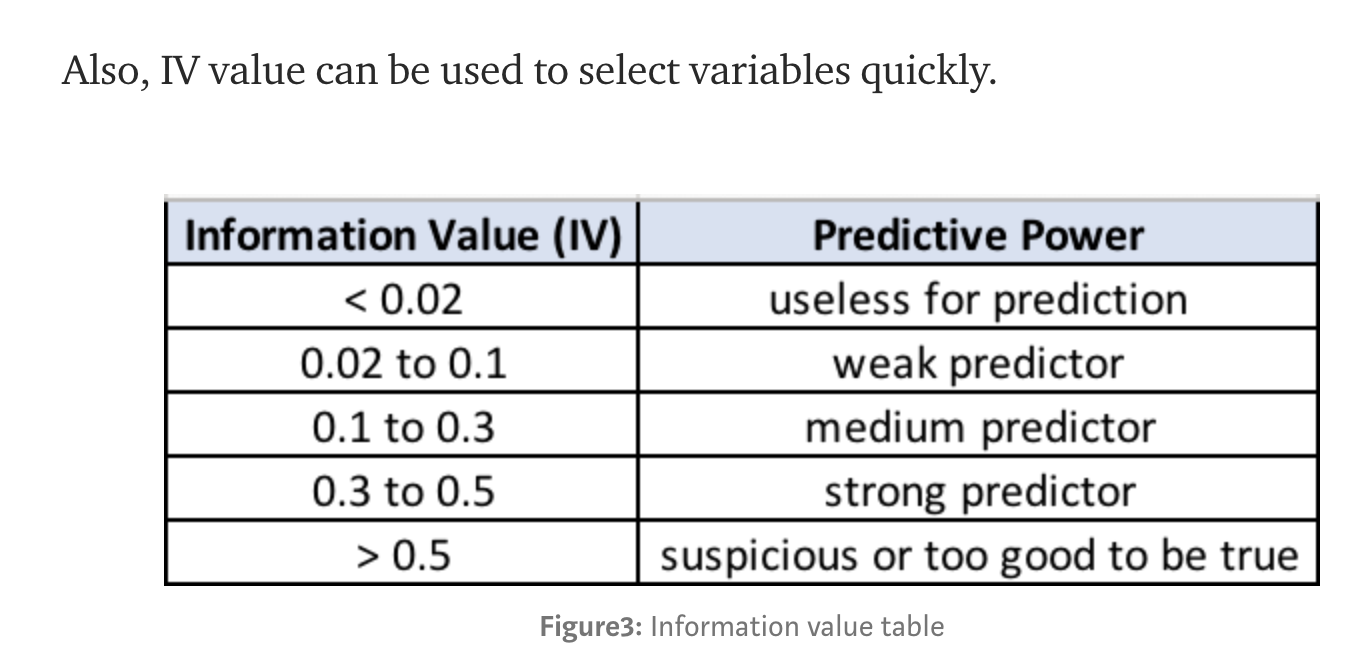

In [101]:
IV[IV.IV >= 0.02]

,VAR_NAME,IV
78,trans_fail_top_count_enum_last_1_month,0.497814
21,history_fail_fee,0.487978
49,loans_score,0.440826
2,apply_score,0.344304
47,loans_overdue_count,0.274585
79,trans_fail_top_count_enum_last_6_month,0.213766
26,latest_one_month_fail,0.169082
77,trans_fail_top_count_enum_last_12_month,0.160922
28,latest_one_month_suc,0.113682
63,rank_trad_1_month,0.088583


In [102]:
IV = IV.reset_index(drop=True)

In [103]:
# IV.to_clipboard()

In [104]:
obj = IV[IV.IV >= 0.02]
obj

,VAR_NAME,IV
0,trans_fail_top_count_enum_last_1_month,0.497814
1,history_fail_fee,0.487978
2,loans_score,0.440826
3,apply_score,0.344304
4,loans_overdue_count,0.274585
5,trans_fail_top_count_enum_last_6_month,0.213766
6,latest_one_month_fail,0.169082
7,trans_fail_top_count_enum_last_12_month,0.160922
8,latest_one_month_suc,0.113682
9,rank_trad_1_month,0.088583


In [105]:
# IV值挑选出的变量
# 'trans_fail_top_count_enum_last_1_month',
#  'history_fail_fee',
#  'loans_score',
#  'apply_score',
#  'loans_overdue_count',
#  'trans_fail_top_count_enum_last_12_month',
#  'trans_fail_top_count_enum_last_6_month',
#  'latest_one_month_fail',
#  'rank_trad_1_month',
col_left_iv = obj['VAR_NAME'].tolist()

In [106]:
col_left_iv

['trans_fail_top_count_enum_last_1_month',
 'history_fail_fee',
 'loans_score',
 'apply_score',
 'loans_overdue_count',
 'trans_fail_top_count_enum_last_6_month',
 'latest_one_month_fail',
 'trans_fail_top_count_enum_last_12_month',
 'latest_one_month_suc',
 'rank_trad_1_month',
 'max_cumulative_consume_later_1_month',
 'consfin_avg_limit',
 'consfin_credit_limit',
 'trans_day_last_12_month',
 'top_trans_count_last_1_month',
 'latest_query_time_diff_day',
 'pawns_auctions_trusts_consume_last_1_month',
 'latest_query_day',
 'consume_mini_time_last_1_month',
 'consfin_max_limit',
 'latest_six_month_loan',
 'avg_price_last_12_month',
 'avg_price_top_last_12_valid_month']

## 随机森林

https://blog.csdn.net/zjuPeco/article/details/77371645

In [107]:
df.head()

,low_volume_percent,middle_volume_percent,trans_activity_month,trans_activity_day,rank_trad_1_month,top_trans_count_last_1_month,avg_price_top_last_12_valid_month,regional_mobility,student_feature,is_high_user,reg_preference_for_trad,first_transaction_time_diff_day,latest_query_time_diff_day,loans_latest_time_diff_day,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,transd_mcc,trans_days_interval_filter,trans_days_interval,repayment_capability,number_of_trans_from_2011,historical_trans_amount,historical_trans_day,trans_amount_3_month,avg_consume_less_12_valid_month,abs,avg_price_last_12_month,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,status
148,0.01,0.99,0.83,0.136,1.00,1.00,0.45,2,1,0,4,445,37,189,300,0.99,13.0,127.0,95.0,10480,10.0,33830,41.0,4260,5.0,830,1300,0.0,27.0,0.0,15.0,0.0,3.0,4.0,4.0,0.0,0,3.0,0.0,0,6160,0.0,434.0,93.0,530.0,78.0,11.0,5.0,5.0,12.0,3.0,3.0,8.0,493.0,63.0,16.0,16.0,2.0,2.0,0.0,2.0,0.0,0.0,3.0,16.0,10.0,0.0,0.0,302.0,2400.0,63.0,2.0,4.0,2800.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,164.0,0
3321,0.01,0.99,1.00,0.438,0.30,0.10,0.55,2,1,0,2,249,27,27,1500,0.72,14.0,6.0,6.0,15790,6.0,100060,79.0,28580,4.0,10550,1040,6.0,6.0,9.0,9.0,0.0,2.0,3.0,3.0,267070.0,2800,5.0,0.0,0,4350,0.0,238.0,82.0,545.0,79.0,16.0,9.0,6.0,22.0,5.0,9.0,14.0,515.0,72.0,59.0,53.0,2.0,17.0,4.0,13.0,3.0,3.0,27.0,62.0,19.0,4.0,0.0,351.0,2100.0,72.0,13.0,15.0,4000.0,1992.0,7700.0,82.0,4.0,5.0,18000.0,7600.0,2.0,2.0,0
1225,0.01,0.95,0.83,0.486,0.25,0.05,0.50,4,0,0,2,2642,31,92,500,0.98,22.0,23.0,15.0,14050,70.0,302720,359.0,63600,7.0,650,1140,10.0,15.0,10.0,15.0,0.0,2.0,10.0,10.0,852.0,2390,5.0,0.0,1160,52310,0.0,2631.0,82.0,524.0,80.0,15.0,7.0,5.0,24.0,2.0,8.0,14.0,483.0,75.0,58.0,48.0,9.0,19.0,7.0,12.0,0.0,1.0,14.0,64.0,42.0,1.0,0.0,354.0,2100.0,73.0,12.0,12.0,3700.0,1725.0,10000.0,79.0,7.0,8.0,12000.0,8614.0,6.0,67.0,0
3852,0.01,0.96,0.68,0.555,0.20,0.05,0.50,3,0,0,2,1240,50,135,0,0.82,18.0,7.0,7.0,11880,26.0,367680,267.0,64150,6.0,6260,1090,7.0,7.0,7.0,7.0,0.0,2.0,2.0,5.0,501194.0,2030,3.0,0.0,1230,43930,0.0,1229.0,82.0,540.0,78.0,6.0,3.0,2.0,7.0,1.0,4.0,5.0,503.0,75.0,25.0,25.0,1.0,11.0,3.0,8.0,0.0,0.0,6.0,47.0,3.0,0.0,0.0,348.0,1600.0,73.0,8.0,8.0,2300.0,1362.0,8400.0,78.0,3.0,3.0,13200.0,8800.0,25.0,110.0,0
2111,0.09,0.91,0.88,0.136,1.00,1.00,0.60,2,0,0,2,882,48,116,500,4.24,15.0,81.0,36.0,11010,21.0,30610,71.0,3000,6.0,550,570,0.0,22.0,0.0,22.0,0.0,8.0,8.0,8.0,0.0,0,4.0,0.0,0,8270,0.0,871.0,141.0,533.0,79.0,6.0,1.0,2.0,8.0,2.0,3.0,3.0,462.0,75.0,11.0,5.0,5.0,4.0,3.0,1.0,0.0,0.0,6.0,5.0,130.0,0.0,12.0,318.0,1200.0,76.0,1.0,1.0,1200.0,1200.0,2100.0,79.0,3.0,4.0,2400.0,1466.0,23.0,91.0,1


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3326 entries, 148 to 1274
Data columns (total 84 columns):
low_volume_percent                            3326 non-null float64
middle_volume_percent                         3326 non-null float64
trans_activity_month                          3326 non-null float64
trans_activity_day                            3326 non-null float64
rank_trad_1_month                             3326 non-null float64
top_trans_count_last_1_month                  3326 non-null float64
avg_price_top_last_12_valid_month             3326 non-null float64
regional_mobility                             3326 non-null int64
student_feature                               3326 non-null int64
is_high_user                                  3326 non-null int64
reg_preference_for_trad                       3326 non-null int64
first_transaction_time_diff_day               3326 non-null int64
latest_query_time_diff_day                    3326 non-null int64
loans_latest_time_d

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
x_train, y_train = df.iloc[:, :-1].values, df['status'].values

In [111]:
x_train

array([[ 1.000e-02,  9.900e-01,  8.300e-01, ...,  0.000e+00,  1.200e+01,
         1.640e+02],
       [ 1.000e-02,  9.900e-01,  1.000e+00, ...,  7.600e+03,  2.000e+00,
         2.000e+00],
       [ 1.000e-02,  9.500e-01,  8.300e-01, ...,  8.614e+03,  6.000e+00,
         6.700e+01],
       ...,
       [ 2.000e-02,  9.000e-01,  9.500e-01, ...,  1.218e+04, -2.000e+00,
         5.700e+01],
       [ 0.000e+00,  8.800e-01,  9.000e-01, ...,  7.050e+03, -9.990e+02,
        -9.990e+02],
       [ 1.000e-02,  9.000e-01,  7.700e-01, ...,  1.260e+04,  1.400e+01,
         3.000e+01]])

In [112]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [113]:
forest = RandomForestClassifier(n_estimators=1000, random_state=2018, n_jobs=-1)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [114]:
feat_labels = df.columns[:-1]

In [115]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
# for f in range(x_train.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

In [116]:
indices

array([32, 65, 53, 44, 57, 67, 19, 23, 36, 25, 26, 21, 15, 22, 40, 33,  3,
       80, 42, 11, 34, 43, 74, 12, 81, 82, 17, 75, 13, 64, 18, 28, 20, 30,
       68, 79, 66, 56, 27,  4, 14, 73,  2, 45, 69, 49, 55, 29, 16, 63, 39,
       52,  1, 51, 35, 76, 46,  6, 37, 47, 58, 70, 54, 50,  0, 72, 71, 62,
       60, 48, 78, 24, 77, 59,  5,  7, 31, 61, 10,  8, 38,  9, 41])

In [117]:
importances

array([0.00792504, 0.00977612, 0.0108576 , 0.01453332, 0.01100578,
       0.00632603, 0.00875253, 0.00492852, 0.0019313 , 0.00025549,
       0.0029399 , 0.01430261, 0.01351035, 0.01313203, 0.01097504,
       0.01501018, 0.01026565, 0.01318202, 0.01233432, 0.01704441,
       0.01226053, 0.01516028, 0.01465302, 0.0169985 , 0.00679153,
       0.0158497 , 0.0157423 , 0.01107174, 0.01232223, 0.01034945,
       0.01219011, 0.00362528, 0.04984368, 0.01454778, 0.01404314,
       0.00938149, 0.01660827, 0.00869993, 0.0005417 , 0.00993821,
       0.01464785, 0.00019832, 0.01440399, 0.01374961, 0.0314321 ,
       0.01075492, 0.00893614, 0.00865114, 0.00743947, 0.01051435,
       0.00820694, 0.00952876, 0.00992935, 0.03554162, 0.00839504,
       0.0103768 , 0.01117739, 0.02158338, 0.00863966, 0.00645896,
       0.00744187, 0.00358102, 0.00752007, 0.01017681, 0.01274292,
       0.04571222, 0.01188826, 0.01999895, 0.01195478, 0.0106823 ,
       0.00846698, 0.00772358, 0.00788566, 0.01093517, 0.01362

In [118]:
obj_rf = pd.DataFrame(zip(feat_labels, importances), columns=['feature', 'importance'])

In [119]:
cond = obj_rf.importance>0.01
obj_rf[cond].shape

(50, 2)

In [120]:
obj_rf_left = obj_rf[cond].sort_values('importance', ascending=False)

In [121]:
obj_rf_left

,feature,importance
32,trans_fail_top_count_enum_last_1_month,0.049844
65,history_fail_fee,0.045712
53,loans_score,0.035542
44,apply_score,0.031432
57,loans_overdue_count,0.021583
67,latest_one_month_fail,0.019999
19,repayment_capability,0.017044
23,trans_amount_3_month,0.016999
36,max_cumulative_consume_later_1_month,0.016608
25,abs,0.015850


In [122]:
col_left_rf = obj_rf_left['feature'].tolist()

In [123]:
col_left_iv

['trans_fail_top_count_enum_last_1_month',
 'history_fail_fee',
 'loans_score',
 'apply_score',
 'loans_overdue_count',
 'trans_fail_top_count_enum_last_6_month',
 'latest_one_month_fail',
 'trans_fail_top_count_enum_last_12_month',
 'latest_one_month_suc',
 'rank_trad_1_month',
 'max_cumulative_consume_later_1_month',
 'consfin_avg_limit',
 'consfin_credit_limit',
 'trans_day_last_12_month',
 'top_trans_count_last_1_month',
 'latest_query_time_diff_day',
 'pawns_auctions_trusts_consume_last_1_month',
 'latest_query_day',
 'consume_mini_time_last_1_month',
 'consfin_max_limit',
 'latest_six_month_loan',
 'avg_price_last_12_month',
 'avg_price_top_last_12_valid_month']

In [124]:
col_left_set = set(col_left_rf+col_left_iv)

In [125]:
len(col_left_set)

54

In [138]:
col_left = [col for col in df.columns if col in col_left_set]

In [139]:
print(col_left)

['trans_activity_month', 'trans_activity_day', 'rank_trad_1_month', 'top_trans_count_last_1_month', 'avg_price_top_last_12_valid_month', 'first_transaction_time_diff_day', 'latest_query_time_diff_day', 'loans_latest_time_diff_day', 'take_amount_in_later_12_month_highest', 'trans_amount_increase_rate_lately', 'transd_mcc', 'trans_days_interval_filter', 'trans_days_interval', 'repayment_capability', 'number_of_trans_from_2011', 'historical_trans_amount', 'historical_trans_day', 'trans_amount_3_month', 'abs', 'avg_price_last_12_month', 'trans_top_time_last_1_month', 'trans_top_time_last_6_month', 'consume_top_time_last_1_month', 'consume_top_time_last_6_month', 'trans_fail_top_count_enum_last_1_month', 'trans_fail_top_count_enum_last_6_month', 'trans_fail_top_count_enum_last_12_month', 'consume_mini_time_last_1_month', 'max_cumulative_consume_later_1_month', 'pawns_auctions_trusts_consume_last_1_month', 'pawns_auctions_trusts_consume_last_6_month', 'first_transaction_day', 'trans_day_last

## 移除方差较低的特征

In [126]:
cols_merge = []
for col_list in [cols_0_to_1, cols_catg, cols_date_diff, cols_nums, ['status']]:
    cols_merge.extend(col_list)

df = train_set[cols_merge].copy()

In [127]:
label = train_set['status']
features = df.drop(['status'],axis = 1, inplace=False)

In [128]:
from sklearn.feature_selection import VarianceThreshold

variance_select = VarianceThreshold(threshold=0)
variance_select.fit(features)
variances = variance_select.variances_
variances_df = pd.DataFrame({'features':features.columns, 'variance':variances}, columns=['features', 'variance'])
variances_df = variances_df.sort_values('variance',ascending=False)

In [129]:
variances_df.variance = variances_df.variance.map(lambda x: '%0.3f' % x)

In [130]:
variances_df.head()

,features,variance
35,consume_mini_time_last_1_month,135787703124.296
21,historical_trans_amount,117573738296.963
23,trans_amount_3_month,13350596106.795
19,repayment_capability,3604713338.693
25,abs,866479426.971


In [131]:
cond = variances_df['features'].isin(col_left_set)
variances_df[cond].shape

(54, 2)

In [132]:
variances_df

,features,variance
35,consume_mini_time_last_1_month,135787703124.296
21,historical_trans_amount,117573738296.963
23,trans_amount_3_month,13350596106.795
19,repayment_capability,3604713338.693
25,abs,866479426.971
40,pawns_auctions_trusts_consume_last_6_month,855423632.350
79,consfin_max_limit,211808687.807
36,max_cumulative_consume_later_1_month,84990201.041
75,consfin_credit_limit,53647535.032
39,pawns_auctions_trusts_consume_last_1_month,51978259.365


In [133]:
df.head()

,low_volume_percent,middle_volume_percent,trans_activity_month,trans_activity_day,rank_trad_1_month,top_trans_count_last_1_month,avg_price_top_last_12_valid_month,regional_mobility,student_feature,is_high_user,reg_preference_for_trad,first_transaction_time_diff_day,latest_query_time_diff_day,loans_latest_time_diff_day,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,transd_mcc,trans_days_interval_filter,trans_days_interval,repayment_capability,number_of_trans_from_2011,historical_trans_amount,historical_trans_day,trans_amount_3_month,avg_consume_less_12_valid_month,abs,avg_price_last_12_month,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,status
148,0.01,0.99,0.83,0.136,1.00,1.00,0.45,2,1,0,4,445,37,189,300,0.99,13.0,127.0,95.0,10480,10.0,33830,41.0,4260,5.0,830,1300,0.0,27.0,0.0,15.0,0.0,3.0,4.0,4.0,0.0,0,3.0,0.0,0,6160,0.0,434.0,93.0,530.0,78.0,11.0,5.0,5.0,12.0,3.0,3.0,8.0,493.0,63.0,16.0,16.0,2.0,2.0,0.0,2.0,0.0,0.0,3.0,16.0,10.0,0.0,0.0,302.0,2400.0,63.0,2.0,4.0,2800.0,2400.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,164.0,0
3321,0.01,0.99,1.00,0.438,0.30,0.10,0.55,2,1,0,2,249,27,27,1500,0.72,14.0,6.0,6.0,15790,6.0,100060,79.0,28580,4.0,10550,1040,6.0,6.0,9.0,9.0,0.0,2.0,3.0,3.0,267070.0,2800,5.0,0.0,0,4350,0.0,238.0,82.0,545.0,79.0,16.0,9.0,6.0,22.0,5.0,9.0,14.0,515.0,72.0,59.0,53.0,2.0,17.0,4.0,13.0,3.0,3.0,27.0,62.0,19.0,4.0,0.0,351.0,2100.0,72.0,13.0,15.0,4000.0,1992.0,7700.0,82.0,4.0,5.0,18000.0,7600.0,2.0,2.0,0
1225,0.01,0.95,0.83,0.486,0.25,0.05,0.50,4,0,0,2,2642,31,92,500,0.98,22.0,23.0,15.0,14050,70.0,302720,359.0,63600,7.0,650,1140,10.0,15.0,10.0,15.0,0.0,2.0,10.0,10.0,852.0,2390,5.0,0.0,1160,52310,0.0,2631.0,82.0,524.0,80.0,15.0,7.0,5.0,24.0,2.0,8.0,14.0,483.0,75.0,58.0,48.0,9.0,19.0,7.0,12.0,0.0,1.0,14.0,64.0,42.0,1.0,0.0,354.0,2100.0,73.0,12.0,12.0,3700.0,1725.0,10000.0,79.0,7.0,8.0,12000.0,8614.0,6.0,67.0,0
3852,0.01,0.96,0.68,0.555,0.20,0.05,0.50,3,0,0,2,1240,50,135,0,0.82,18.0,7.0,7.0,11880,26.0,367680,267.0,64150,6.0,6260,1090,7.0,7.0,7.0,7.0,0.0,2.0,2.0,5.0,501194.0,2030,3.0,0.0,1230,43930,0.0,1229.0,82.0,540.0,78.0,6.0,3.0,2.0,7.0,1.0,4.0,5.0,503.0,75.0,25.0,25.0,1.0,11.0,3.0,8.0,0.0,0.0,6.0,47.0,3.0,0.0,0.0,348.0,1600.0,73.0,8.0,8.0,2300.0,1362.0,8400.0,78.0,3.0,3.0,13200.0,8800.0,25.0,110.0,0
2111,0.09,0.91,0.88,0.136,1.00,1.00,0.60,2,0,0,2,882,48,116,500,4.24,15.0,81.0,36.0,11010,21.0,30610,71.0,3000,6.0,550,570,0.0,22.0,0.0,22.0,0.0,8.0,8.0,8.0,0.0,0,4.0,0.0,0,8270,0.0,871.0,141.0,533.0,79.0,6.0,1.0,2.0,8.0,2.0,3.0,3.0,462.0,75.0,11.0,5.0,5.0,4.0,3.0,1.0,0.0,0.0,6.0,5.0,130.0,0.0,12.0,318.0,1200.0,76.0,1.0,1.0,1200.0,1200.0,2100.0,79.0,3.0,4.0,2400.0,1466.0,23.0,91.0,1


In [134]:
test_set.head()

,low_volume_percent,middle_volume_percent,trans_activity_month,trans_activity_day,rank_trad_1_month,top_trans_count_last_1_month,avg_price_top_last_12_valid_month,regional_mobility,student_feature,is_high_user,reg_preference_for_trad,first_transaction_time_diff_day,latest_query_time_diff_day,loans_latest_time_diff_day,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,transd_mcc,trans_days_interval_filter,trans_days_interval,repayment_capability,number_of_trans_from_2011,historical_trans_amount,historical_trans_day,trans_amount_3_month,avg_consume_less_12_valid_month,abs,avg_price_last_12_month,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,status
2616,0.00,1.00,1.00,0.355,0.45,0.30,0.50,2,0,0,4,650,31,45,300,0.42,20.0,35.0,15.0,8690,19.0,120620,149.0,23180,8.0,8170,1210,5.0,35.0,5.0,35.0,1.0,3.0,9.0,9.0,0.0,2650,3.0,0.0,0,14550,0.0,639.0,82.0,509.0,79.0,21.0,11.0,4.0,23.0,9.0,13.0,18.0,485.0,77.0,28.0,21.0,2.0,17.0,7.0,10.0,1.0,2.0,13.0,35.0,28.0,2.0,5.0,360.0,2200.0,74.0,10.0,11.0,3500.0,1940.0,5600.0,79.0,7.0,7.0,9600.0,3985.0,3.0,17.0,1
4449,0.03,0.79,0.87,0.597,0.45,0.15,0.60,3,0,0,2,1013,79,79,1000,0.99,21.0,17.0,11.0,19390,27.0,480980,339.0,41110,4.0,1520,920,17.0,17.0,17.0,17.0,2.0,2.0,4.0,4.0,1484573.0,1440,10.0,0.0,1100,34600,0.0,1002.0,82.0,645.0,71.0,10.0,5.0,5.0,14.0,0.0,2.0,6.0,619.0,75.0,50.0,45.0,0.0,15.0,4.0,11.0,0.0,6.0,21.0,67.0,6.0,0.0,0.0,359.0,3000.0,75.0,11.0,14.0,6200.0,1845.0,14900.0,77.0,4.0,4.0,19200.0,5900.0,54.0,54.0,0
3386,0.02,0.98,0.70,0.705,0.20,0.05,0.60,3,1,0,4,1377,26,33,1100,0.96,24.0,10.0,6.0,20820,30.0,354380,361.0,75110,7.0,140,880,5.0,6.0,5.0,6.0,1.0,2.0,5.0,5.0,20379.0,1800,6.0,0.0,0,17410,0.0,1366.0,82.0,550.0,76.0,35.0,19.0,12.0,68.0,17.0,41.0,60.0,505.0,74.0,56.0,53.0,5.0,20.0,10.0,10.0,2.0,2.0,29.0,93.0,10.0,2.0,2.0,350.0,1700.0,70.0,10.0,10.0,2300.0,1580.0,10900.0,77.0,10.0,12.0,20400.0,6810.0,1.0,8.0,0
2224,0.01,0.99,1.00,0.372,0.35,0.20,0.45,2,0,0,2,461,48,76,0,0.55,18.0,22.0,13.0,13260,13.0,196220,136.0,37120,7.0,2920,1440,13.0,22.0,13.0,22.0,0.0,0.0,7.0,7.0,1116956.0,2020,15.0,0.0,0,6130,0.0,450.0,82.0,551.0,76.0,14.0,8.0,3.0,17.0,6.0,6.0,12.0,499.0,77.0,46.0,43.0,8.0,21.0,7.0,14.0,0.0,2.0,19.0,52.0,27.0,2.0,1.0,348.0,2300.0,76.0,14.0,15.0,3400.0,1885.0,6400.0,81.0,7.0,8.0,9600.0,5657.0,23.0,51.0,0
2456,0.03,0.97,0.93,0.350,1.00,1.00,1.00,3,1,0,1,974,173,125,3800,0.43,15.0,285.0,17.0,25650,27.0,220,238.0,0,9.0,39760,0,14.0,14.0,0.0,0.0,0.0,0.0,2.0,2.0,24.0,0,0.0,0.0,0,0,0.0,963.0,82.0,530.0,82.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,487.0,72.0,4.0,4.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,342.0,1400.0,72.0,1.0,1.0,1400.0,1400.0,0.0,0.0,0.0,0.0,0.0,0.0,148.0,100.0,0


In [135]:
test_set.isnull().sum()

low_volume_percent                            0
middle_volume_percent                         0
trans_activity_month                          0
trans_activity_day                            0
rank_trad_1_month                             0
top_trans_count_last_1_month                  0
avg_price_top_last_12_valid_month             0
regional_mobility                             0
student_feature                               0
is_high_user                                  0
reg_preference_for_trad                       0
first_transaction_time_diff_day               0
latest_query_time_diff_day                    0
loans_latest_time_diff_day                    0
take_amount_in_later_12_month_highest         0
trans_amount_increase_rate_lately             0
transd_mcc                                    0
trans_days_interval_filter                    0
trans_days_interval                           0
repayment_capability                          0
number_of_trans_from_2011               